<a href="https://colab.research.google.com/github/Moin-shadab/Hotel-Booking-Analysis/blob/main/Individual_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing important liberary
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
# Setting our Hotel Booking.csv path
path = '/content/drive/MyDrive/ALMABETTER/Cohort Madrid/Module 1 : Python For Data Science/Capstone Project/EDA/Data'
df = pd.read_csv(path + '/Hotel Bookings.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.columns
col = [print(i) for i in df.columns]

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


First we have to clean our Data.
---
Having clean data will ultimately increase overall productivity and allow for the highest quality information in your decision-making.

We will proceed these steps for our data cleaning.
---

1. Removing duplicate values from our data.

2. Handling with NULL values.

3. Making our columns of appropriate data type.

4. Adding some columns.

Step 1 - Removing Duplicate Rows
---



In [ ]:
df[df.duplicated()].shape  

(31994, 32)

In [ ]:
# As we hv alot of duplicate rows first we need to remove this
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(87396, 32)

Step 2 - Handeling with NULL values 
---



In [ ]:
# Checking the null values in our Data Frame/
df.isnull().sum().sort_values(ascending = False)[:10]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

As we can see that we have alot of null values in company and agent.

NULL should be means that customer did't book hotel by company or agent.
So we need to consider it as 0.

In [ ]:
# Filling Null values with 0.
df[['company','agent','children']] = df[['company','agent','children']].fillna(0)

We also have NULL values in countries.It might be an due to error in data so we can consider it as "others"

In [ ]:
# Converting Null values in countries as others.
df['country'] = df['country'].fillna("others")

Now we can check if there is any Missing or NULL values present.

In [ ]:
# Checking Null values.
df.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64



Alright, we handeled with our Null values.
---




Step 3 - Making Column of appropriarte data type.
---

We have float values in children, agent and company which is inappropriate. 

So we need to change these columns type to int. 

In [ ]:
# As we know childrens can never be 1.0 or 1.4. same for company and agent so converting float to int  
df[['children', "company", 'agent']] = df[['children', "company", 'agent']].astype(int)

In [ ]:
# Check if these columns converted to int
# df.info()

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type = datetime64.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

In [ ]:
df['reservation_status_date'][:3]

0   2015-07-01
1   2015-07-01
2   2015-07-02
Name: reservation_status_date, dtype: datetime64[ns]

Step 4 - Adding some columns.
---



In [ ]:
# Here we have some case in which adult child and babies are 0 it may be possible if someone books hotel and did't come to the hotel.
df[df['adults']+df['babies']+df['children'] == 0].shape


(166, 32)

So we have 166 rows which have sum is equal to zero

In [ ]:
# Adding total person row in our Data Frame.
df['total_person'] = df['adults']+df['children']+df['babies']

Que 1 - Which meal is preferred by most Customer?
---



In [ ]:
#Checking the types of meal we have
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

Here we have Undefined food. Which should be that coutomer ordered food from outside. So we need to make undefined as "other".

In [ ]:
# Checking Total order of specific foods.
df['meal'].replace(to_replace="Undefined", value = "others", inplace = True)
customer_meal = df['meal'].value_counts()
customer_meal.sort_values(ascending = False)

BB        67978
SC         9481
HB         9085
others      492
FB          360
Name: meal, dtype: int64

Text(0.5, 0, 'Food Type')

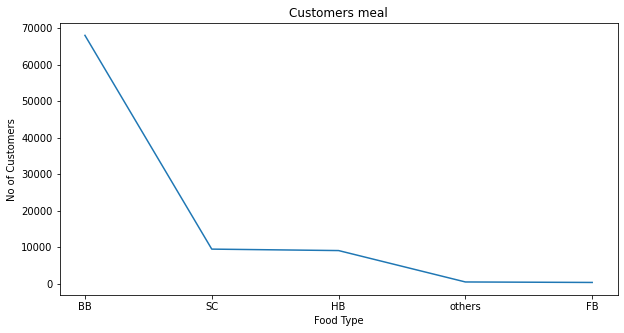

In [ ]:
# Ploting a line chart to see which food is order most.
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(customer_meal)
plt.title('Customers meal')
plt.ylabel('No of Customers')
plt.xlabel('Food Type')

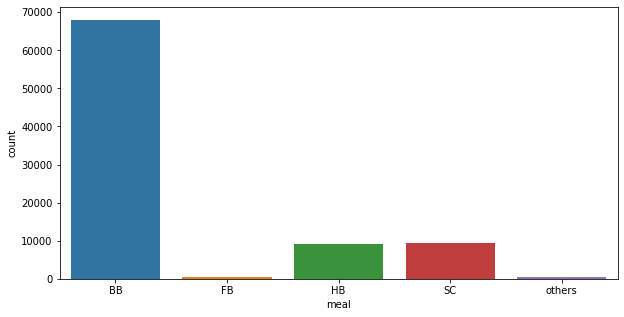

In [ ]:
# Checking most ordered meal in bar chart.
sns.countplot(x = df['meal'])
plt.show()

So mostly guests are preferring BB food type

Que 2 - Which Hotel is booked most?
---



In [ ]:
# Calculating Percentage of each Hotel Booking. 
grouped_by_hotel = df.groupby('hotel')
x = ['City Hotel', 'Resort Hotel']
perc = [round((i / df.shape[0]) * 100, 0) for i in list(grouped_by_hotel.size())]

Text(0, 0.5, 'Booking Percentage % ')

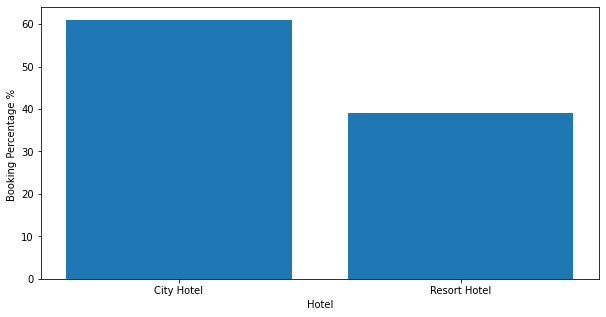

In [ ]:
# Ploting the Booking Percentage Graph. 
plt.bar(x, perc)
plt.xlabel("Hotel")
plt.ylabel("Booking Percentage % ")

People preffered City Hotels most as compared to Resort Hotels. As we can see 61% of City Hotels are booked and 41% of Resort Hotels are booked

Que 3 - Which hotel has higher bookings cancellation rate?
---



In [ ]:
cancelled_booking = df[df['is_canceled'] == 1]
cancel_grp = cancelled_booking.groupby('hotel')
data1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
data2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
data3 = pd.concat([data1,data2], axis = 1)

# Calculating cancel percentage 
data3['cancel_%'] = round((data3['total_cancelled_bookings']/data3['total_bookings'])*100,2)
# data3

In [ ]:
data2

,total_bookings
hotel,
City Hotel,53428
Resort Hotel,33968


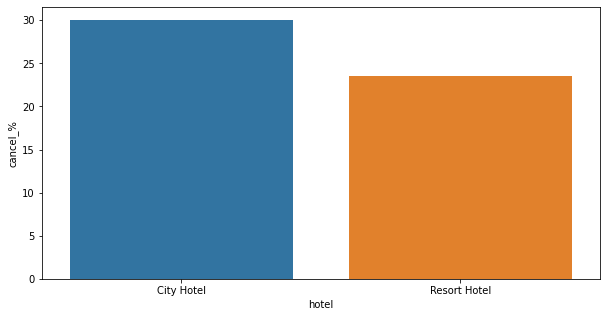

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = data3.index, y = data3['cancel_%'])
plt.show()

As we see approx 30% of city hotels gets cancelled.

Que 4 - From where the most guests are coming ?
---



We are going to print top five countries frm which we have number of guests

In [ ]:
# We are considering top 5 countries of most guest
no_of_guest = df.groupby('country')
guest_df = pd.DataFrame(no_of_guest.size()).rename(columns = {0:"No_of_People"})
guest_df.sort_values(by='No_of_People', ascending=False, inplace = True)
final_guest_df = guest_df[:5]

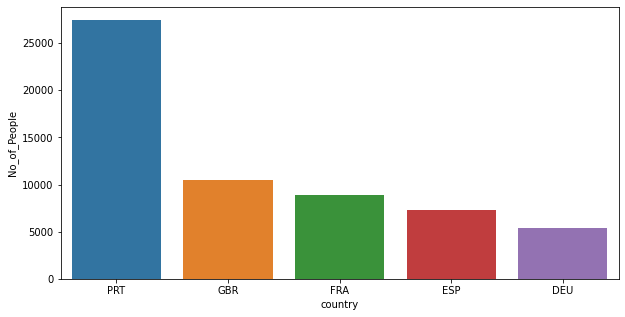

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = final_guest_df.index, y = final_guest_df['No_of_People'])
plt.show()

So as we can see most guests are from Portugal which are around 30,000. and others mostly are frm european countries.

Que 5 - Which month we have most guests?
---

In [ ]:
# Creating Data frame of guest and month 
d_month = df['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()

,index,months,Number of guests
0,11,January,4693
1,8,February,6098
2,5,March,7513
3,3,April,7908
4,2,May,8355
5,4,June,7765
6,1,July,10057
7,0,August,11257
8,7,September,6690
9,6,October,6934


In [ ]:
# Calculating the mean price for resort and city hotel
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel


,month,price_for_resort,price_for_city_hotel
0,April,76.841664,114.121066
1,August,182.103524,122.497179
2,December,63.977295,90.111067
3,February,53.624311,87.843338
4,January,48.542066,83.180097
5,July,150.914540,119.740148
6,June,108.970363,120.486062
7,March,57.083964,90.759820
8,May,77.725129,124.533785
9,November,48.928493,87.751507


In [ ]:
# Creating Data Frame of ariving guest in resort hotel
resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

,month,no of guests
0,August,3153
1,July,3013
2,May,2246
3,October,2211
4,March,2192
5,April,2169
6,February,2053
7,June,1927
8,September,1875
9,November,1745


In [ ]:
# Creating Data Frame of ariving guest in city hotel
city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

,month,no of guests
0,August,4481
1,July,3846
2,May,3667
3,March,3491
4,June,3484
5,April,3330
6,September,3173
7,October,3081
8,February,2630
9,November,2196


In [ ]:
# Creating a final Data frame in which we have all above data sets
final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()
final_guest

,index,month,no of guests in resort,no of guest in city hotel
0,11,January,1689,1966
1,6,February,2053,2630
2,4,March,2192,3491
3,5,April,2169,3330
4,2,May,2246,3667
5,7,June,1927,3484
6,1,July,3013,3846
7,0,August,3153,4481
8,8,September,1875,3173
9,3,October,2211,3081


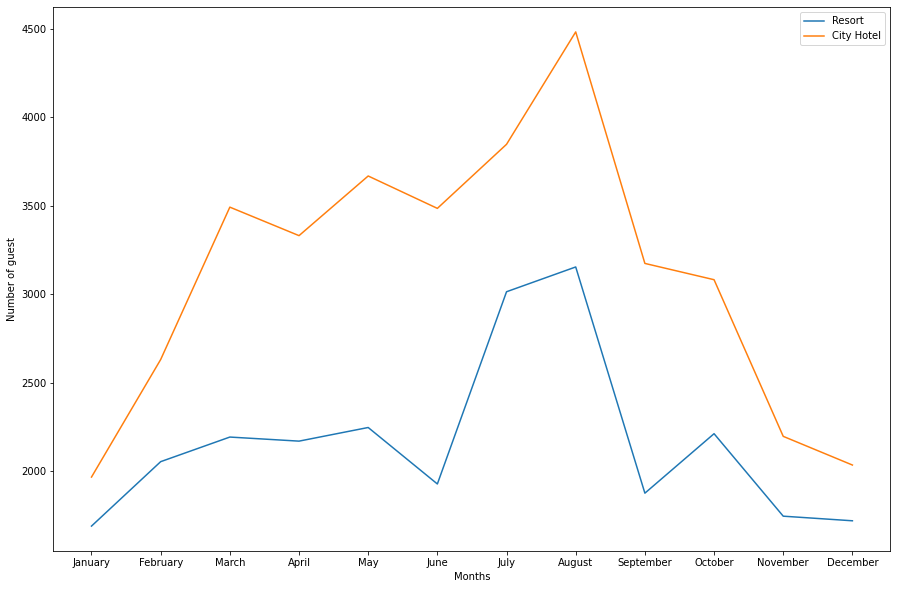

In [ ]:
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
plt.xlabel('Months')
fig = plt.gcf()
fig.set_size_inches(15,10)

Between June and the end of August, Guest is at its peak

Que 6 - What is the best month for Booking a Hotel?
---



In [ ]:
# Adding new column in which we hv total no of guest from the city and resort hotel.
final_guest['Total guests'] = final_guest['no of guests in resort'] + final_guest['no of guest in city hotel']
final_guest

,index,month,no of guests in resort,no of guest in city hotel,Total guests
0,11,January,1689,1966,3655
1,6,February,2053,2630,4683
2,4,March,2192,3491,5683
3,5,April,2169,3330,5499
4,2,May,2246,3667,5913
5,7,June,1927,3484,5411
6,1,July,3013,3846,6859
7,0,August,3153,4481,7634
8,8,September,1875,3173,5048
9,3,October,2211,3081,5292


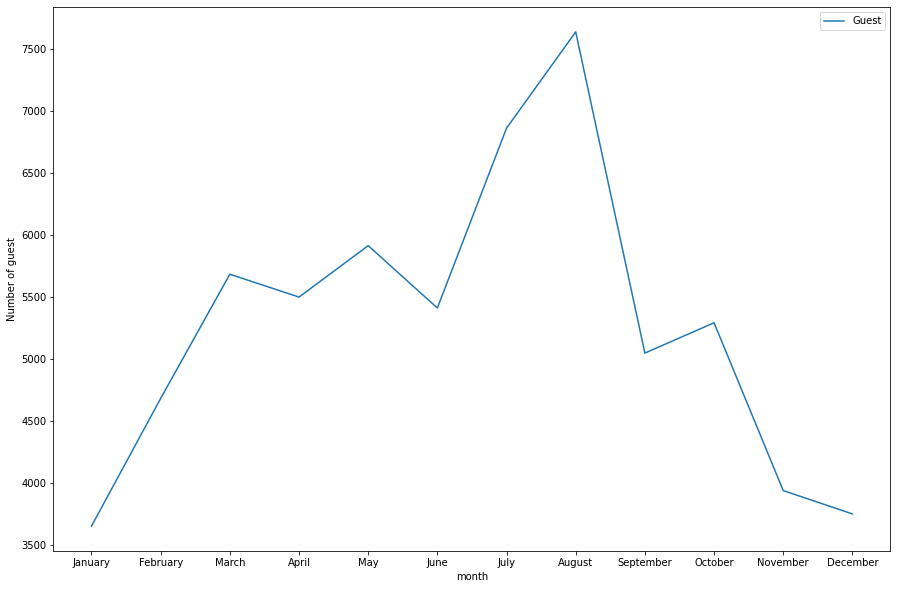

In [ ]:
sns.lineplot(data=final_guest, x='month', y='Total guests')
plt.legend(['Guest'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)

So between June and the end of August, attendance is at its peak. So the best month for booking hotel should be June

Que 7 - How many guests Single😥, Couple😁 and Married😭?  
---

In [ ]:
df['single'] = df['adults'] == 1
df['couple'] = df['adults'] == 2
df['married'] = df['adults'] + df['children'] + df['babies'] >= 3
type_ = ['Single','Couple','Married']
total = [df['single'].sum(), df['couple'].sum(), df['married'].sum()]
data = list(zip(type_, total))

In [ ]:
guest_df = pd.DataFrame(data).rename(columns = {0:"Guest_Type", 1:"Total"})
guest_df

,Guest_Type,Total
0,Single,16503
1,Couple,64497
2,Married,14101


In [ ]:
label = guest_df.Guest_Type
values = guest_df.Total

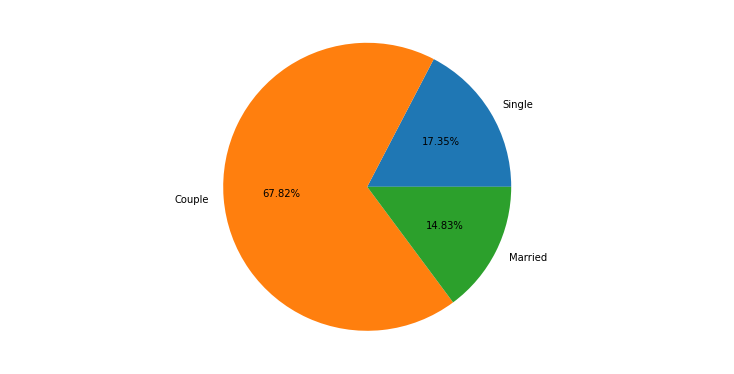

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(values, labels = label, autopct = '%1.2f%%')
plt.show()

We have mostly guests are Couple😁.